## Source Data Set: [here](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = r"E:\python_projects\dz"

#### 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [37]:
names_by_year = {}
for year in range (1900, 2001):
    names_by_year[year] = pd.read_csv(DATA_PATH + "\yob{}.txt".format(year),
                       names=["Name", "Gender", "Count"])

names = pd.concat(names_by_year, names=["Year", "Pos"])
names_dynamics = names.groupby([names.index.get_level_values(0), "Name"]).sum()
names_dynamics = names_dynamics.query("Name == ['Ruth', 'Robert']").unstack("Name")

In [38]:
print(names_dynamics)

      Count       
Name Robert   Ruth
Year              
1900   3845   4781
1901   2559   3989
1902   3201   4401
1903   3057   4531
1904   3427   4915
1905   3431   5088
1906   3651   5159
1907   4042   5588
1908   4245   6200
1909   4588   6526
1910   5638   7247
1911   6565   8032
1912  12901  11323
1913  15755  12642
1914  21268  15885
1915  28854  21924
1916  31863  23245
1917  35388  23618
1918  40798  25581
1919  41211  24628
1920  48883  26155
1921  53025  25841
1922  54034  23702
1923  56370  23699
1924  61097  23672
1925  61246  22325
1926  61500  20294
1927  62080  19508
1928  61131  17928
1929  60236  16085
...     ...    ...
1971  50952   1640
1972  43323   1383
1973  38950   1288
1974  37280   1304
1975  35579   1235
1976  34045   1208
1977  34458   1198
1978  33644   1219
1979  34275   1209
1980  34535   1262
1981  34630   1272
1982  34654   1193
1983  33000   1135
1984  32002   1174
1985  32326   1125
1986  31582   1096
1987  30447   1040
1988  30495   1012
1989  30190 

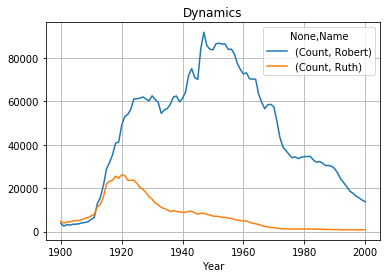

In [39]:
names_dynamics.plot(title="Dynamics", grid=True)

#### 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

In [40]:
names_by_year = {}
for year in range (1900, 2001, 5):
    names_by_year[year] = pd.read_csv(DATA_PATH + "\yob{}.txt".format(year),
                       names=["Name", "Gender", "Count"])
    
names = pd.concat(names_by_year, names=["Year", "Pos"])
names_dynamics = names.groupby([names.index.get_level_values(0), "Name"]).sum()
names_dynamics = names_dynamics.query("Name == ['Ruth', 'Robert']").unstack("Name")

In [41]:
print(names_dynamics)

      Count       
Name Robert   Ruth
Year              
1900   3845   4781
1905   3431   5088
1910   5638   7247
1915  28854  21924
1920  48883  26155
1925  61246  22325
1930  62572  15010
1935  56755  10041
1940  61401   8922
1945  70132   8063
1950  83768   7138
1955  83953   6200
1960  72640   4960
1965  63389   3242
1970  57529   1828
1975  35579   1235
1980  34535   1262
1985  32326   1125
1990  28980    913
1995  18627    858
2000  13760    903


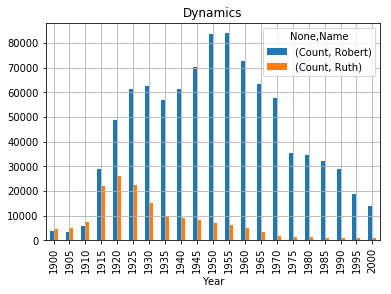

In [42]:
names_dynamics.plot.bar(title="Dynamics", grid=True)
# Как пофиксить года в графике?)

#### 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [55]:
names_1950 = pd.read_csv(DATA_PATH + "\yob1950.txt".format(year),
                       names=["Name", "Gender", "Count"])

names_1950 = names_1950.sort_values(by=["Count", "Name"],ascending=False).head(10)
names_1950 = names_1950.drop('Gender', 1)

# Надо убрать столбец индексов. Как сделать?

In [56]:
print(names_1950)

          Name  Count
6111     James  86239
6112    Robert  83565
0        Linda  80432
6113      John  79420
1         Mary  65482
6114   Michael  65151
6115     David  60730
6116   William  60690
6117   Richard  51001
2     Patricia  47945


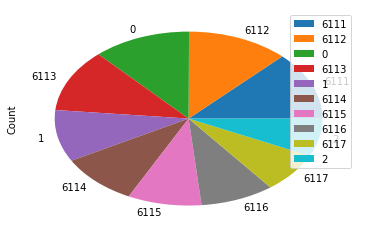

In [39]:
names_1950.plot.pie(y='Count')

### 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [46]:
CONSONANTS = ('b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'y', 'z')
def get_consonants_count(name):
    i = 0
    for char in name:
        if char.lower() in CONSONANTS:
            i += 1
    return i

In [47]:
names = []
for year in range (1900, 2001):
    names_by_year = pd.read_csv(DATA_PATH + "\yob{}.txt".format(year),
                       names=["Name", "Gender", "Count"])
    names.append(names_by_year)
    
names = pd.concat(names, names=["Year", "Pos"])

names_dynamics = names.groupby([names.index.get_level_values(0), "Name"]).sum()
names_dynamics = names_dynamics.reset_index(1)
names_dynamics['Consonants count'] = names_dynamics.apply(lambda row: get_consonants_count(row.Name), axis=1)

In [51]:
names_dynamics = names_dynamics.sort_values(by=["Count", "Name"],ascending=False).head(10)
print(names_dynamics)
# Надо убрать столбец индексов. Как сделать?

       Name    Count  Consonants count
0      Mary  2875573                 3
0  Jennifer   859215                 5
1      Mary   564292                 3
2  Patricia   534130                 4
0     Linda   508403                 3
0      Lisa   420568                 2
0   Jessica   397949                 4
4     Susan   387056                 3
1    Ashley   386369                 4
1     Helen   317584                 3


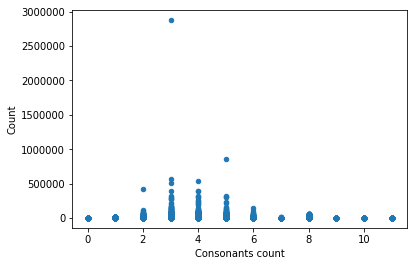

In [49]:
names_dynamics.plot.scatter(x='Consonants count', y='Count')